In [25]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
# plt.rc('font', family='SimHei', size=8)

In [29]:
start = '20180701'
end = '20190712'

symbols = ['BTC','ETH','EOS','BCH','LTC']
max_change = 0.1

pro = ts.pro_api()
df = pro.coinbar(exchange='okex', symbol='btcusdt', freq='daily', start_date=start, end_date=end)
# df = df.iloc[::-1]
df['change'] = (df['close'] - df['open']) / df['open']

df1 = df[df['change'] > 0.1]
df1['class'] = 'today'

next_day = []
for i in df1.index:
    next_day.append(df.iloc[i-1, :])


df_next = pd.DataFrame(next_day)
df_next['class'] = 'tomorrow'

df_res = pd.concat([df1, df_next]).sort_index()
df_res = df_res.sort_values('date')
df_res

/Users/dfg/WorkSpace/test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,symbol,date,open,high,low,close,vol,change,class
225,btcusdt,2018-11-28,3782.3027,4282.899,3743.69,4249.2639,51478.597689,0.123459,today
224,btcusdt,2018-11-29,4246.5688,4444.000,4130.00,4268.2720,51428.062222,0.005111,tomorrow
100,btcusdt,2019-04-02,4145.0000,4914.800,4135.00,4732.8000,143596.615770,0.141809,today
99,btcusdt,2019-04-03,4732.8000,5031.100,4668.50,4962.0000,155093.375717,0.048428,tomorrow
59,btcusdt,2019-05-13,6876.1000,7900.400,6822.80,7782.9000,159532.218485,0.131877,today
58,btcusdt,2019-05-14,7782.9000,8349.000,7672.30,7954.7000,136345.111673,0.022074,tomorrow
45,btcusdt,2019-05-27,7982.1000,8882.600,7936.30,8798.0000,139212.961304,0.102216,today
44,btcusdt,2019-05-28,8800.6000,8903.700,8500.00,8686.4000,120229.769070,-0.012976,tomorrow
19,btcusdt,2019-06-22,9789.4000,11194.700,9789.40,10798.7000,136143.065806,0.103101,today
18,btcusdt,2019-06-23,10805.7000,11008.900,10418.00,10809.9000,104428.544955,0.000389,tomorrow


<IPython.core.display.Javascript object>


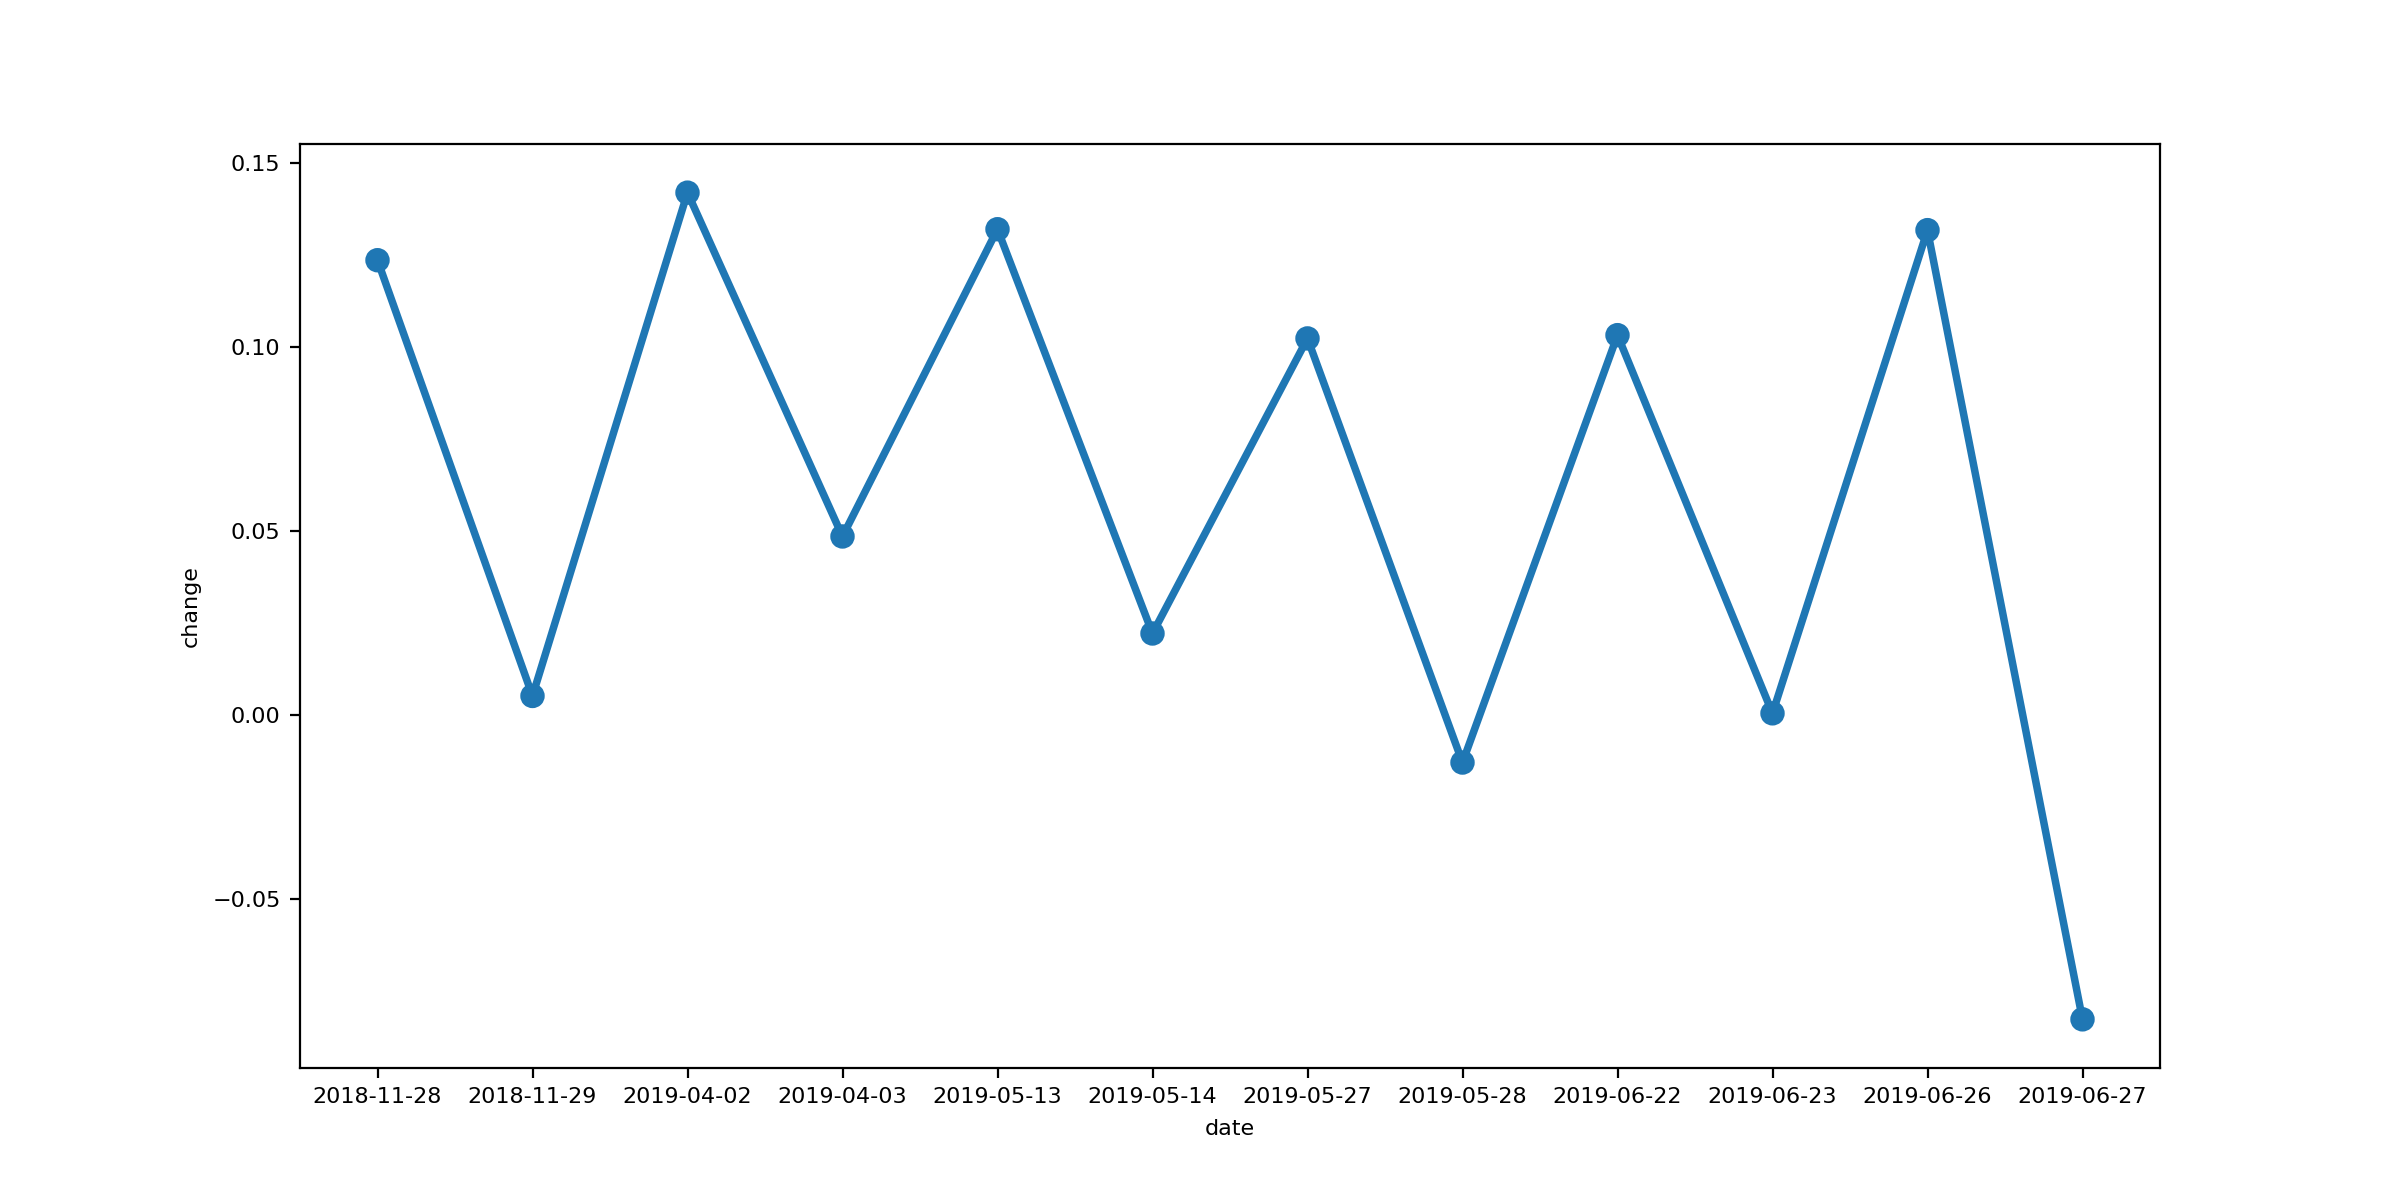

In [35]:
plt.figure(figsize=(12, 6))
sns.pointplot(x="date", y="change", data=df_res,
             linestyles=["-", "--"], capsize=0.1, size=10)
